In [ ]:
import io
import pandas as pd
from google.colab import files
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
uploaded = files.upload()

Saving EIA930_BALANCE_2020_Jan_Jun.xlsx to EIA930_BALANCE_2020_Jan_Jun (1).xlsx


In [ ]:
df = pd.read_excel(io.BytesIO(uploaded.get('EIA930_BALANCE_2020_Jan_Jun.xlsx')))
df

,Balancing Authority,Date,Is_weekend,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),...,Net Generation (MW) from Coal,Net Generation (MW) from Natural Gas,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,Region
0,AEC,2020-01-01,0.0,1,2020-01-01 01:00:00,2020-01-01 07:00:00,1082.0,549.0,722.0,173.0,...,-5.0,722.0,NaN,NaN,0.0,NaN,NaN,5.0,NaN,SE
1,AEC,2020-01-01,0.0,2,2020-01-01 02:00:00,2020-01-01 08:00:00,1084.0,549.0,724.0,175.0,...,-3.0,722.0,NaN,NaN,0.0,NaN,NaN,4.0,NaN,SE
2,AEC,2020-01-01,0.0,3,2020-01-01 03:00:00,2020-01-01 09:00:00,1103.0,554.0,718.0,164.0,...,-6.0,719.0,NaN,NaN,0.0,NaN,NaN,5.0,NaN,SE
3,AEC,2020-01-01,0.0,4,2020-01-01 04:00:00,2020-01-01 10:00:00,1127.0,565.0,715.0,150.0,...,-4.0,714.0,NaN,NaN,0.0,NaN,NaN,5.0,NaN,SE
4,AEC,2020-01-01,0.0,5,2020-01-01 05:00:00,2020-01-01 11:00:00,1179.0,575.0,718.0,143.0,...,-4.0,717.0,NaN,NaN,0.0,NaN,NaN,5.0,NaN,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279663,YAD,2020-06-30,0.0,20,06/30/2020 8:00:00 PM,2020-01-07 00:00:00,NaN,NaN,138.0,134.0,...,NaN,NaN,NaN,NaN,138.0,NaN,NaN,NaN,NaN,CAR
279664,YAD,2020-06-30,0.0,21,06/30/2020 9:00:00 PM,2020-01-07 01:00:00,NaN,NaN,138.0,136.0,...,NaN,NaN,NaN,NaN,138.0,NaN,NaN,NaN,NaN,CAR
279665,YAD,2020-06-30,0.0,22,06/30/2020 10:00:00 PM,2020-01-07 02:00:00,NaN,NaN,138.0,136.0,...,NaN,NaN,NaN,NaN,138.0,NaN,NaN,NaN,NaN,CAR
279666,YAD,2020-06-30,0.0,23,06/30/2020 11:00:00 PM,2020-01-07 03:00:00,NaN,NaN,138.0,133.0,...,NaN,NaN,NaN,NaN,138.0,NaN,NaN,NaN,NaN,CAR


In [ ]:
df.duplicated().sum()

0

In [ ]:
df1=df[['Date','Hour Number','Is_weekend','Local Time at End of Hour','Demand Forecast (MW)','Demand (MW)','Net Generation (MW)','Total Interchange (MW)','Region']]
df1

,Date,Hour Number,Is_weekend,Local Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Region
0,2020-01-01,1,0.0,2020-01-01 01:00:00,1082.0,549.0,722.0,173.0,SE
1,2020-01-01,2,0.0,2020-01-01 02:00:00,1084.0,549.0,724.0,175.0,SE
2,2020-01-01,3,0.0,2020-01-01 03:00:00,1103.0,554.0,718.0,164.0,SE
3,2020-01-01,4,0.0,2020-01-01 04:00:00,1127.0,565.0,715.0,150.0,SE
4,2020-01-01,5,0.0,2020-01-01 05:00:00,1179.0,575.0,718.0,143.0,SE
...,...,...,...,...,...,...,...,...,...
279663,2020-06-30,20,0.0,06/30/2020 8:00:00 PM,NaN,NaN,138.0,134.0,CAR
279664,2020-06-30,21,0.0,06/30/2020 9:00:00 PM,NaN,NaN,138.0,136.0,CAR
279665,2020-06-30,22,0.0,06/30/2020 10:00:00 PM,NaN,NaN,138.0,136.0,CAR
279666,2020-06-30,23,0.0,06/30/2020 11:00:00 PM,NaN,NaN,138.0,133.0,CAR


In [ ]:
df1.columns = ['Date','HourNum','IsWeekend','LocalTime','DemandForecast','Demand','Net_Generation','Total_Interchange','Region']
df1

,Date,HourNum,IsWeekend,LocalTime,DemandForecast,Demand,Net_Generation,Total_Interchange,Region
0,2020-01-01,1,0.0,2020-01-01 01:00:00,1082.0,549.0,722.0,173.0,SE
1,2020-01-01,2,0.0,2020-01-01 02:00:00,1084.0,549.0,724.0,175.0,SE
2,2020-01-01,3,0.0,2020-01-01 03:00:00,1103.0,554.0,718.0,164.0,SE
3,2020-01-01,4,0.0,2020-01-01 04:00:00,1127.0,565.0,715.0,150.0,SE
4,2020-01-01,5,0.0,2020-01-01 05:00:00,1179.0,575.0,718.0,143.0,SE
...,...,...,...,...,...,...,...,...,...
279663,2020-06-30,20,0.0,06/30/2020 8:00:00 PM,NaN,NaN,138.0,134.0,CAR
279664,2020-06-30,21,0.0,06/30/2020 9:00:00 PM,NaN,NaN,138.0,136.0,CAR
279665,2020-06-30,22,0.0,06/30/2020 10:00:00 PM,NaN,NaN,138.0,136.0,CAR
279666,2020-06-30,23,0.0,06/30/2020 11:00:00 PM,NaN,NaN,138.0,133.0,CAR


In [ ]:
df1.dtypes


Date                 datetime64[ns]
HourNum                       int64
IsWeekend                   float64
LocalTime                    object
DemandForecast              float64
Demand                      float64
Net_Generation              float64
Total_Interchange           float64
Region                       object
dtype: object

In [ ]:
df1.Date = pd.to_datetime(df1.Date)
df1.LocalTime = pd.to_datetime(df1.LocalTime)
df1['IsWeekend'] = df1['IsWeekend'].fillna(0).astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df1['Time'] = [d.time() for d in df1['LocalTime']]
df1.drop('LocalTime', axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
missing = df1.isnull()
missing.sum()

Date                    11
HourNum                  0
IsWeekend                0
DemandForecast       48748
Demand               44575
Net_Generation        1026
Total_Interchange     1014
Region                   0
Time                     0
dtype: int64

In [ ]:
df1_unique_Region = set(df1.Region)
print(df1_unique_Region)

{'FLA', 'SE', 'CAL', 'TEN', 'SW', 'TEX', 'NY', 'NE', 'CAR', 'NW', 'MIDA', 'MIDW', 'CENT'}


In [ ]:
CAL_df = df1.loc[df1.Region.str.contains('CAL')]
SW_df = df1.loc[df1.Region.str.contains('SW')]
NE_df = df1.loc[df1.Region.str.contains('NE')]
NY_df = df1.loc[df1.Region.str.contains('NY')]
TEX_df = df1.loc[df1.Region.str.contains('TEX')]
NW_df = df1.loc[df1.Region.str.contains('NW')]
TEN_df = df1.loc[df1.Region.str.contains('TEN')]
FLA_df = df1.loc[df1.Region.str.contains('FLA')]
MIDA_df = df1.loc[df1.Region.str.contains('MIDA')]
CENT_df = df1.loc[df1.Region.str.contains('CENTL')]
MIDW_df = df1.loc[df1.Region.str.contains('MIDW')]
CAR_df = df1.loc[df1.Region.str.contains('CAR')]
SE_df = df1.loc[df1.Region.str.contains('SE')]
# יצרנו טבלה חדשה לכל מחוז עם הפריטים שלו, כדי להשלים ערכים חסרים

In [ ]:
# df1['month'] = df1['Date'].dt.month
# df1['month'] = df1['month'].fillna(0).astype(int)

In [ ]:
missing1 = TEX_df.isnull()
missing1.sum()

Date                 0
HourNum              0
IsWeekend            0
DemandForecast       0
Demand               0
Net_Generation       0
Total_Interchange    0
Region               0
Time                 0
dtype: int64

In [ ]:
CAL_df['DemandForecast'].fillna(value = CAL_df['DemandForecast'].mean(), inplace = True) 
CAL_df['Demand'].fillna(value = CAL_df['Demand'].mean(), inplace = True) 
CAL_df['Net_Generation'].fillna(value = CAL_df['Net_Generation'].mean(), inplace = True) 
CAL_df['Total_Interchange'].fillna(value = CAL_df['Total_Interchange'].mean(), inplace = True) 

SW_df['DemandForecast'].fillna(value = SW_df['DemandForecast'].mean(), inplace = True) 
SW_df['Demand'].fillna(value = SW_df['Demand'].mean(), inplace = True) 
SW_df['Net_Generation'].fillna(value = SW_df['Net_Generation'].mean(), inplace = True) 
SW_df['Total_Interchange'].fillna(value = SW_df['Total_Interchange'].mean(), inplace = True) 

NW_df['DemandForecast'].fillna(value = NW_df['DemandForecast'].mean(), inplace = True) 
NW_df['Demand'].fillna(value = NW_df['Demand'].mean(), inplace = True) 
NW_df['Net_Generation'].fillna(value = NW_df['Net_Generation'].mean(), inplace = True) 
NW_df['Total_Interchange'].fillna(value = NW_df['Total_Interchange'].mean(), inplace = True) 

TEN_df['DemandForecast'].fillna(value = TEN_df['DemandForecast'].mean(), inplace = True)

FLA_df['DemandForecast'].fillna(value = FLA_df['DemandForecast'].mean(), inplace = True) 
FLA_df['Demand'].fillna(value = FLA_df['Demand'].mean(), inplace = True) 
FLA_df['Net_Generation'].fillna(value = FLA_df['Net_Generation'].mean(), inplace = True) 
FLA_df['Total_Interchange'].fillna(value = FLA_df['Total_Interchange'].mean(), inplace = True) 

MIDA_df['DemandForecast'].fillna(value = MIDA_df['DemandForecast'].mean(), inplace = True) 
MIDA_df['Demand'].fillna(value = MIDA_df['Demand'].mean(), inplace = True) 
MIDA_df['Net_Generation'].fillna(value = MIDA_df['Net_Generation'].mean(), inplace = True) 
MIDA_df['Total_Interchange'].fillna(value = MIDA_df['Total_Interchange'].mean(), inplace = True) 

MIDW_df['DemandForecast'].fillna(value = MIDW_df['DemandForecast'].mean(), inplace = True) 
MIDW_df['Demand'].fillna(value = MIDW_df['Demand'].mean(), inplace = True) 
MIDW_df['Net_Generation'].fillna(value = MIDW_df['Net_Generation'].mean(), inplace = True) 
MIDW_df['Total_Interchange'].fillna(value = MIDW_df['Total_Interchange'].mean(), inplace = True) 

CAR_df['DemandForecast'].fillna(value = CAR_df['DemandForecast'].mean(), inplace = True) 
CAR_df['Demand'].fillna(value = CAR_df['Demand'].mean(), inplace = True) 
CAR_df['Net_Generation'].fillna(value = CAR_df['Net_Generation'].mean(), inplace = True) 
CAR_df['Total_Interchange'].fillna(value = CAR_df['Total_Interchange'].mean(), inplace = True) 

SE_df['DemandForecast'].fillna(value = SE_df['DemandForecast'].mean(), inplace = True) 
SE_df['Demand'].fillna(value = SE_df['Demand'].mean(), inplace = True) 
SE_df['Net_Generation'].fillna(value = SE_df['Net_Generation'].mean(), inplace = True) 
SE_df['Total_Interchange'].fillna(value = SE_df['Total_Interchange'].mean(), inplace = True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
TEX_df.describe()

,HourNum,IsWeekend,DemandForecast,Demand,Net_Generation,Total_Interchange
count,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000
mean,12.497367,0.285551,41111.500572,40898.438516,40755.802381,-142.829402
std,6.921584,0.451728,7551.442710,7497.970376,7466.772258,232.380325
min,1.000000,0.000000,27872.000000,27449.000000,27450.000000,-1083.000000
25%,6.500000,0.000000,36191.500000,35937.000000,35841.500000,-248.000000
50%,12.000000,0.000000,39543.000000,39363.000000,39248.000000,-75.000000
75%,18.000000,1.000000,44378.500000,44457.500000,44350.000000,4.000000
max,24.000000,1.000000,70254.000000,67792.000000,67127.000000,589.000000


In [ ]:
MIDA_df.describe()

,HourNum,IsWeekend,DemandForecast,Demand,Net_Generation,Total_Interchange
count,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000
mean,12.497367,0.285551,83790.322284,84210.505409,86564.173533,4268.761795
std,6.921584,0.451728,13172.147055,13160.067926,12652.449932,1574.561156
min,1.000000,0.000000,56859.000000,58480.000000,63178.000000,-50.000000
25%,6.500000,0.000000,74598.500000,74791.000000,77953.000000,3167.500000
50%,12.000000,0.000000,82207.000000,82392.000000,84129.000000,4251.000000
75%,18.000000,1.000000,92658.000000,92960.500000,92818.500000,5356.000000
max,24.000000,1.000000,130873.000000,215682.000000,138996.000000,9781.000000


In [ ]:
TEX_df.corr()

,HourNum,IsWeekend,DemandForecast,Demand,Net_Generation,Total_Interchange
HourNum,1.000000,-0.000602,0.452180,0.448847,0.447913,-0.090382
IsWeekend,-0.000602,1.000000,-0.152433,-0.157938,-0.157591,0.032376
DemandForecast,0.452180,-0.152433,1.000000,0.984095,0.983815,-0.140759
Demand,0.448847,-0.157938,0.984095,1.000000,0.999526,-0.149156
Net_Generation,0.447913,-0.157591,0.983815,0.999526,1.000000,-0.118655
Total_Interchange,-0.090382,0.032376,-0.140759,-0.149156,-0.118655,1.000000


In [ ]:
MIDA_df.corr()

,HourNum,IsWeekend,DemandForecast,Demand,Net_Generation,Total_Interchange
HourNum,1.000000,-0.000602,0.274088,0.322424,0.281089,0.062651
IsWeekend,-0.000602,1.000000,-0.229950,-0.208501,-0.217288,0.049280
DemandForecast,0.274088,-0.229950,1.000000,0.942623,0.929412,-0.177339
Demand,0.322424,-0.208501,0.942623,1.000000,0.923596,-0.177700
Net_Generation,0.281089,-0.217288,0.929412,0.923596,1.000000,0.020735
Total_Interchange,0.062651,0.049280,-0.177339,-0.177700,0.020735,1.000000


In [ ]:
fig = go.Figure()
fig.add_traces(go.Heatmap(
    z=TEX_df.corr(), 
    x= TEX_df.corr().columns,  
    y= TEX_df.corr().columns,
))
fig.update_layout({
    'title':"Heart Dataframe Correlation Heatmap"
})


fig.show()

In [ ]:
corr_df = TEX_df.corr()
for i in range(len(corr_df.columns)):
  print(corr_df.columns[i], 'is correlated to: ')
  for j in range(len(corr_df.columns)):
    if abs(corr_df.iloc[i,j])>=0.85 and i is not j:
      print(corr_df.columns[j], end=', ')
  print('\n----------------------')


HourNum is correlated to: 

----------------------
IsWeekend is correlated to: 

----------------------
DemandForecast is correlated to: 
Demand, Net_Generation, 
----------------------
Demand is correlated to: 
DemandForecast, Net_Generation, 
----------------------
Net_Generation is correlated to: 
DemandForecast, Demand, 
----------------------
Total_Interchange is correlated to: 

----------------------


In [ ]:
fig = go.Figure()
fig.add_traces(go.Heatmap(
    z=MIDA_df.corr(), 
    x= MIDA_df.corr().columns,  
    y= MIDA_df.corr().columns,
))
fig.update_layout({
    'title':"Heart Dataframe Correlation Heatmap"
})


fig.show()

In [ ]:
corr_df = MIDA_df.corr()
for i in range(len(corr_df.columns)):
  print(corr_df.columns[i], 'is correlated to: ')
  for j in range(len(corr_df.columns)):
    if abs(corr_df.iloc[i,j])>=0.85 and i is not j:
      print(corr_df.columns[j], end=', ')
  print('\n----------------------')

HourNum is correlated to: 

----------------------
IsWeekend is correlated to: 

----------------------
DemandForecast is correlated to: 
Demand, Net_Generation, 
----------------------
Demand is correlated to: 
DemandForecast, Net_Generation, 
----------------------
Net_Generation is correlated to: 
DemandForecast, Demand, 
----------------------
Total_Interchange is correlated to: 

----------------------


In [ ]:
TEX_df.drop('Net_Generation', axis=1, inplace=True)
MIDA_df.drop('Net_Generation', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
standard_scaler = StandardScaler()
scaled_TEX_df = pd.DataFrame(standard_scaler.fit_transform(TEX_df[['HourNum','DemandForecast','Demand', 'Total_Interchange']]), columns=['HourNum_std','DemandF_std','Demand_std', 'Total_Interchange_std'])
scaled_MIDA_df = pd.DataFrame(standard_scaler.fit_transform(MIDA_df[['HourNum','DemandForecast','Demand', 'Total_Interchange']]), columns=['HourNum_std','DemandF_std','Demand_std', 'Total_Interchange_std'])

In [ ]:

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, len(scaled_TEX_df.columns))]

fig = go.Figure()
fig.add_traces(data=
    [
    go.Box( 
    y=scaled_TEX_df.iloc[:, i], 
    marker_color=c[i],
    name=scaled_TEX_df.columns[i])
    for i in range(len(scaled_TEX_df.columns))
    ])

In [ ]:
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, len(scaled_MIDA_df.columns))]

fig = go.Figure()
fig.add_traces(data=
    [
    go.Box( 
    y=scaled_MIDA_df.iloc[:, i], 
    marker_color=c[i],
    name=scaled_MIDA_df.columns[i])
    for i in range(len(scaled_MIDA_df.columns))
    ])

In [ ]:
def get_outliers(df, series):
  q1 = series.quantile(0.25)
  q3 = series.quantile(0.75)

  if q1*q3 == 0:
    iqr = abs(2*(q1+q3))
    toprange = iqr
    botrange = -toprange
  else:
    iqr = q3-q1
    toprange = q3 + iqr * 1.5
    botrange = q1 - iqr * 1.5

  outliers_top=df[series > toprange]
  outliers_bot= df[series < botrange]
  outliers = pd.concat([outliers_bot, outliers_top], axis=0)

  return (botrange, toprange, outliers)

In [ ]:
botrange, toprange, outliers = get_outliers(TEX_df,TEX_df.Demand)

botrange, toprange, outliers = get_outliers(MIDA_df,MIDA_df.Demand)

TEX_df = TEX_df[~TEX_df.index.isin(outliers.index)]
TEX_df.reset_index(inplace=True, drop=True)
MIDA_df = MIDA_df[~MIDA_df.index.isin(outliers.index)]
MIDA_df.reset_index(inplace=True, drop=True)

In [ ]:
region = df1.groupby(by='Region')
region_mean = region.mean()
region_mean 

,HourNum,IsWeekend,DemandForecast,Demand,Net_Generation,Total_Interchange
Region,,,,,,
CAL,12.497367,0.285551,5627.111810,5668.310027,3621.571612,-1476.630008
CAR,12.497367,0.285551,4636.263571,4541.682116,3796.305157,-36.430210
CENT,12.497367,0.285551,15296.372725,14366.048660,14902.324479,536.619533
FLA,12.497378,0.285551,3027.821255,1266.171586,3003.470822,1666.363378
MIDA,12.497367,0.285551,83790.322284,84210.505409,86564.173533,4268.761795
MIDW,12.498683,0.285518,25591.865892,24892.349462,17259.093022,-1707.139913
NE,12.497367,0.285551,12356.301809,12505.137623,9831.381269,-2673.756354
NW,12.497492,0.285548,2184.019474,2255.738768,1997.807864,359.191086
NY,12.497367,0.285551,15935.188917,16205.180902,13853.854362,-2351.326540


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(name='DemandForecast', x=region_mean.index, y=region_mean.DemandForecast, marker_color='pink'))
fig.add_trace(go.Bar(name='Demand', x=region_mean.index, y=region_mean.Demand, marker_color='purple'))
fig.update_layout(
    barmode='group',
    title='Demand forecast and demand By region', 
    yaxis_title='Amount of denamd')
fig.show()

# TEX

In [ ]:
uploaded = files.upload()

Saving temp 20202 - texas.xlsx to temp 20202 - texas (1).xlsx


In [ ]:
temp_TEX = pd.read_excel(io.BytesIO(uploaded.get('temp 20202 - texas.xlsx')))
TEX_df = pd.merge(left=TEX_df, right=temp_TEX,left_on='Date',right_on='Date', how='left')

In [ ]:
TEX_df.drop('Region',axis= 1,inplace=True)
TEX_df['temp'] = TEX_df['temp'].fillna(0).astype(float)

In [ ]:
uploaded = files.upload()

Saving lockdowns_TEX.xlsx to lockdowns_TEX (1).xlsx


In [ ]:
TEX_df.describe()

,HourNum,IsWeekend,DemandForecast,Demand,Total_Interchange,temp
count,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000,4367.000000
mean,12.497367,0.285551,41111.500572,40898.438516,-142.829402,20.092830
std,6.921584,0.451728,7551.442710,7497.970376,232.380325,6.330963
min,1.000000,0.000000,27872.000000,27449.000000,-1083.000000,2.777778
25%,6.500000,0.000000,36191.500000,35937.000000,-248.000000,15.000000
50%,12.000000,0.000000,39543.000000,39363.000000,-75.000000,20.833333
75%,18.000000,1.000000,44378.500000,44457.500000,4.000000,25.277778
max,24.000000,1.000000,70254.000000,67792.000000,589.000000,31.111111


In [ ]:
MIDA_df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



HourNum                 12.0
IsWeekend                0.0
DemandForecast       82007.0
Demand               82137.0
Total_Interchange     4235.0
dtype: float64

In [ ]:
Lockdown1 = pd.read_excel(io.BytesIO(uploaded.get('lockdowns_TEX.xlsx')))

In [ ]:
Lockdown1.Date = pd.to_datetime(Lockdown1.Date)

In [ ]:
TEX_Lock = pd.merge(left=TEX_df, right=Lockdown1,left_on='Date',right_on='Date', how='left')
TEX_Lock['lockdown'] =TEX_Lock['lockdown'].apply(lambda x: 1 if not pd.isnull(x) else 0)
lockdown_TEX = TEX_Lock.loc[TEX_Lock['lockdown'] == 1]
noLockdown_TEX =TEX_Lock.loc[TEX_Lock['lockdown'] == 0]

# MIDA

In [ ]:
uploaded = files.upload()

Saving temp 20202 - mida.xlsx to temp 20202 - mida (1).xlsx


In [ ]:
temp_MIDA = pd.read_excel(io.BytesIO(uploaded.get('temp 20202 - mida.xlsx')))
MIDA_df = pd.merge(left=MIDA_df, right=temp_MIDA,left_on='Date',right_on='Date', how='left')
MIDA_df.drop('Region',axis=1,inplace=True)
MIDA_df['temp'] = MIDA_df['temp'].fillna(0).astype(float)

In [ ]:
uploaded = files.upload()

Saving lockdowns_MIDA.xlsx to lockdowns_MIDA (1).xlsx


In [ ]:
MIDA_df.describe()

,HourNum,IsWeekend,DemandForecast,Demand,Total_Interchange,temp
count,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000
mean,12.457842,0.288057,83445.520539,83824.692566,4252.680933,10.734991
std,6.935579,0.452910,12669.128370,12477.170313,1569.549693,7.884880
min,1.000000,0.000000,56859.000000,58480.000000,-50.000000,-2.333333
25%,6.000000,0.000000,74547.000000,74721.000000,3156.000000,3.777778
50%,12.000000,0.000000,82007.000000,82137.000000,4235.000000,9.888889
75%,18.000000,1.000000,92401.000000,92636.000000,5330.000000,16.388889
max,24.000000,1.000000,125472.000000,120097.000000,9781.000000,27.777778


In [ ]:
Lockdown = pd.read_excel(io.BytesIO(uploaded.get('lockdowns_MIDA.xlsx')))

In [ ]:
Lockdown.Date = pd.to_datetime(Lockdown.Date)

In [ ]:
MIDA_Lock = pd.merge(left=MIDA_df, right=Lockdown,left_on='Date',right_on='Date', how='left')

In [ ]:
MIDA_Lock['lockdown'] = MIDA_Lock['lockdown'].apply(lambda x: 1 if not pd.isnull(x) else 0)

In [ ]:
lockdown_MIDA = MIDA_Lock.loc[MIDA_Lock['lockdown'] == 1]
noLockdown_MIDA =MIDA_Lock.loc[MIDA_Lock['lockdown'] == 0]
lockdown_MIDA

,Date,HourNum,IsWeekend,DemandForecast,Demand,Total_Interchange,Time,temp,lockdown
1919,2020-03-21,1,1,67739.0,70698.0,5303.0,01:00:00,11.388889,1
1920,2020-03-21,2,1,66610.0,68791.0,6357.0,02:00:00,11.388889,1
1921,2020-03-21,3,1,66068.0,67561.0,7059.0,03:00:00,11.388889,1
1922,2020-03-21,4,1,66491.0,67097.0,6897.0,04:00:00,11.388889,1
1923,2020-03-21,5,1,68053.0,67050.0,6675.0,05:00:00,11.388889,1
...,...,...,...,...,...,...,...,...,...
3891,2020-06-11,20,0,103806.0,106872.0,5830.0,20:00:00,21.833333,1
3892,2020-06-11,21,0,99371.0,102554.0,5148.0,21:00:00,21.833333,1
3893,2020-06-11,22,0,92775.0,99365.0,4903.0,22:00:00,21.833333,1
3894,2020-06-11,23,0,85977.0,93230.0,4522.0,23:00:00,21.833333,1


# Data Visualization

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(name = 'demand',x = lockdown_TEX.Demand , marker_color='#1967D2'))
fig.add_trace(go.Histogram(name = 'demand forecast', x=lockdown_TEX.DemandForecast, marker_color='#FB4C2F'))

fig.update_layout(barmode='overlay', bargap=0.2)
fig.update_traces(opacity=0.5)
fig.show()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(name = 'demand',x = lockdown_MIDA.Demand , marker_color='#1967D2'))
fig.add_trace(go.Histogram(name = 'demand forecast', x=lockdown_MIDA.DemandForecast, marker_color='#FB4C2F'))

fig.update_layout(barmode='overlay', bargap=0.2)

fig.update_traces(opacity=0.5)
fig.show()

In [ ]:
a = lockdown_TEX.groupby(by='IsWeekend').count()
b = noLockdown_TEX.groupby(by='IsWeekend').count()
c = lockdown_MIDA.groupby(by='IsWeekend').count()
d = noLockdown_MIDA.groupby(by='IsWeekend').count()

In [ ]:
tt = pd.pivot_table(data=lockdown_TEX, index=['IsWeekend'], values=['Demand'])
tt.reset_index(inplace=True)
aa = pd.pivot_table(data=noLockdown_TEX, index=['IsWeekend'], values=['Demand'])
aa.reset_index(inplace=True)
cc = pd.pivot_table(data=lockdown_MIDA, index=['IsWeekend'], values=['Demand'])
cc.reset_index(inplace=True)
dd = pd.pivot_table(data=noLockdown_MIDA, index=['IsWeekend'], values=['Demand'])
dd.reset_index(inplace=True)

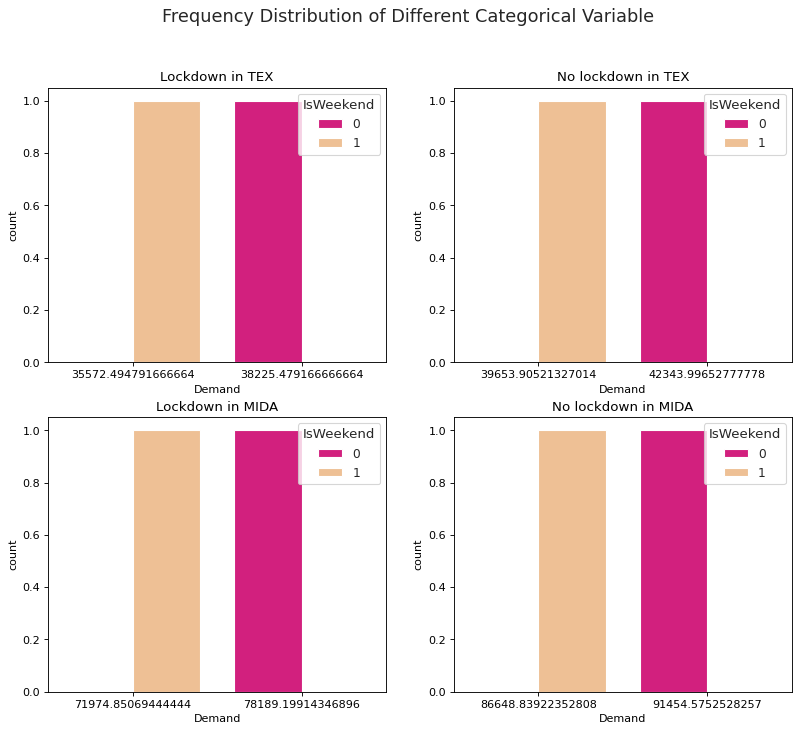

In [ ]:
# ממוצע צריכה בשתי המחוזות, סגר/לא סגר לפי סופש/אמצש
import itertools
fig, axarr = plt.subplots(2, 2, figsize=(12,10), dpi=80, facecolor='w', edgecolor='k')
sns.set(style="white")
sns.countplot(x='Demand', hue = 'IsWeekend',data = tt , ax=axarr[0][0], palette="Accent_r")
axarr[0][0].set_title('Lockdown in TEX')
sns.countplot(x='Demand', hue = 'IsWeekend',data = aa , ax=axarr[0][1], palette="Accent_r")
axarr[0][1].set_title('No lockdown in TEX')
sns.countplot(x='Demand', hue = 'IsWeekend',data = cc ,ax=axarr[1][0], palette="Accent_r")
axarr[1][0].set_title('Lockdown in MIDA')
sns.countplot(x='Demand', hue = 'IsWeekend',data = dd , ax=axarr[1][1], palette="Accent_r")
axarr[1][1].set_title('No lockdown in MIDA')
fig.suptitle('Frequency Distribution of Different Categorical Variable', fontsize=16);

Text(0.5, 1.0, 'Demand in MIDA during no lockdown')

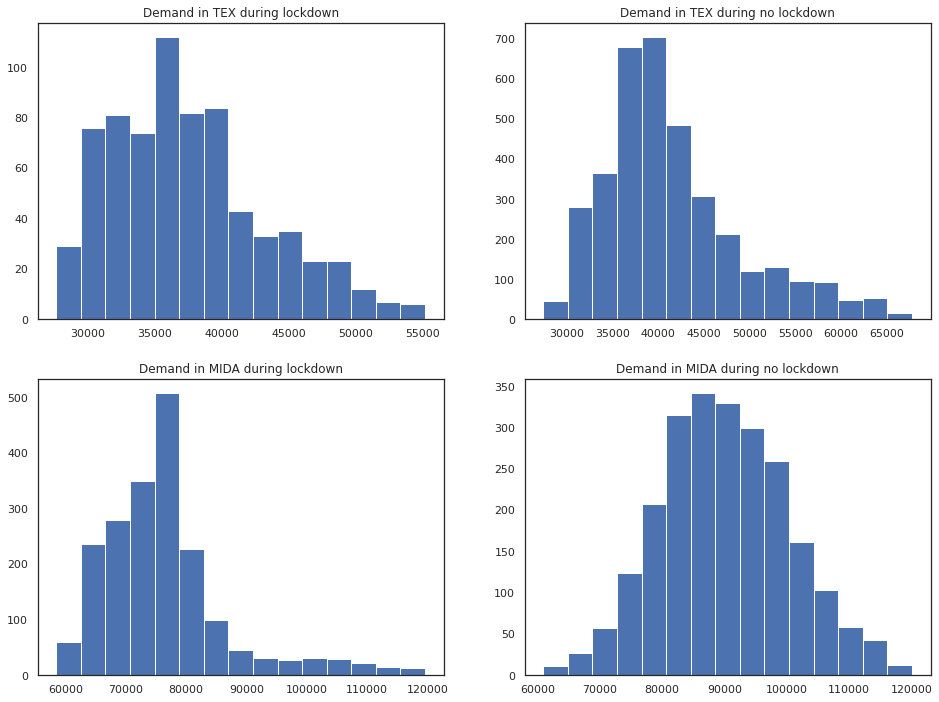

In [ ]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)

plt.hist(lockdown_TEX['Demand'], bins = 15)

plt.title('Demand in TEX during lockdown')

plt.subplot(2,2,2)

plt.hist(noLockdown_TEX['Demand'], bins = 15)

plt.title('Demand in TEX during no lockdown')

plt.subplot(2,2,3)

plt.hist(lockdown_MIDA['Demand'], bins = 15)

plt.title('Demand in MIDA during lockdown')

plt.subplot(2,2,4)

plt.hist(noLockdown_MIDA['Demand'], bins = 15)

plt.title('Demand in MIDA during no lockdown')

In [ ]:
pivot_TEX = pd.pivot_table(data=lockdown_TEX, index=['Date'], aggfunc='sum')
pivot_MIDA = pd.pivot_table(data=lockdown_MIDA, index=['Date'], aggfunc='sum')
pivot_TEX2 = pd.pivot_table(data=noLockdown_TEX, index=['Date'], aggfunc='sum')
pivot_MIDA2 = pd.pivot_table(data=noLockdown_MIDA, index=['Date'], aggfunc='sum')

Text(0.5, 1.0, 'Total cash by orders 2021')

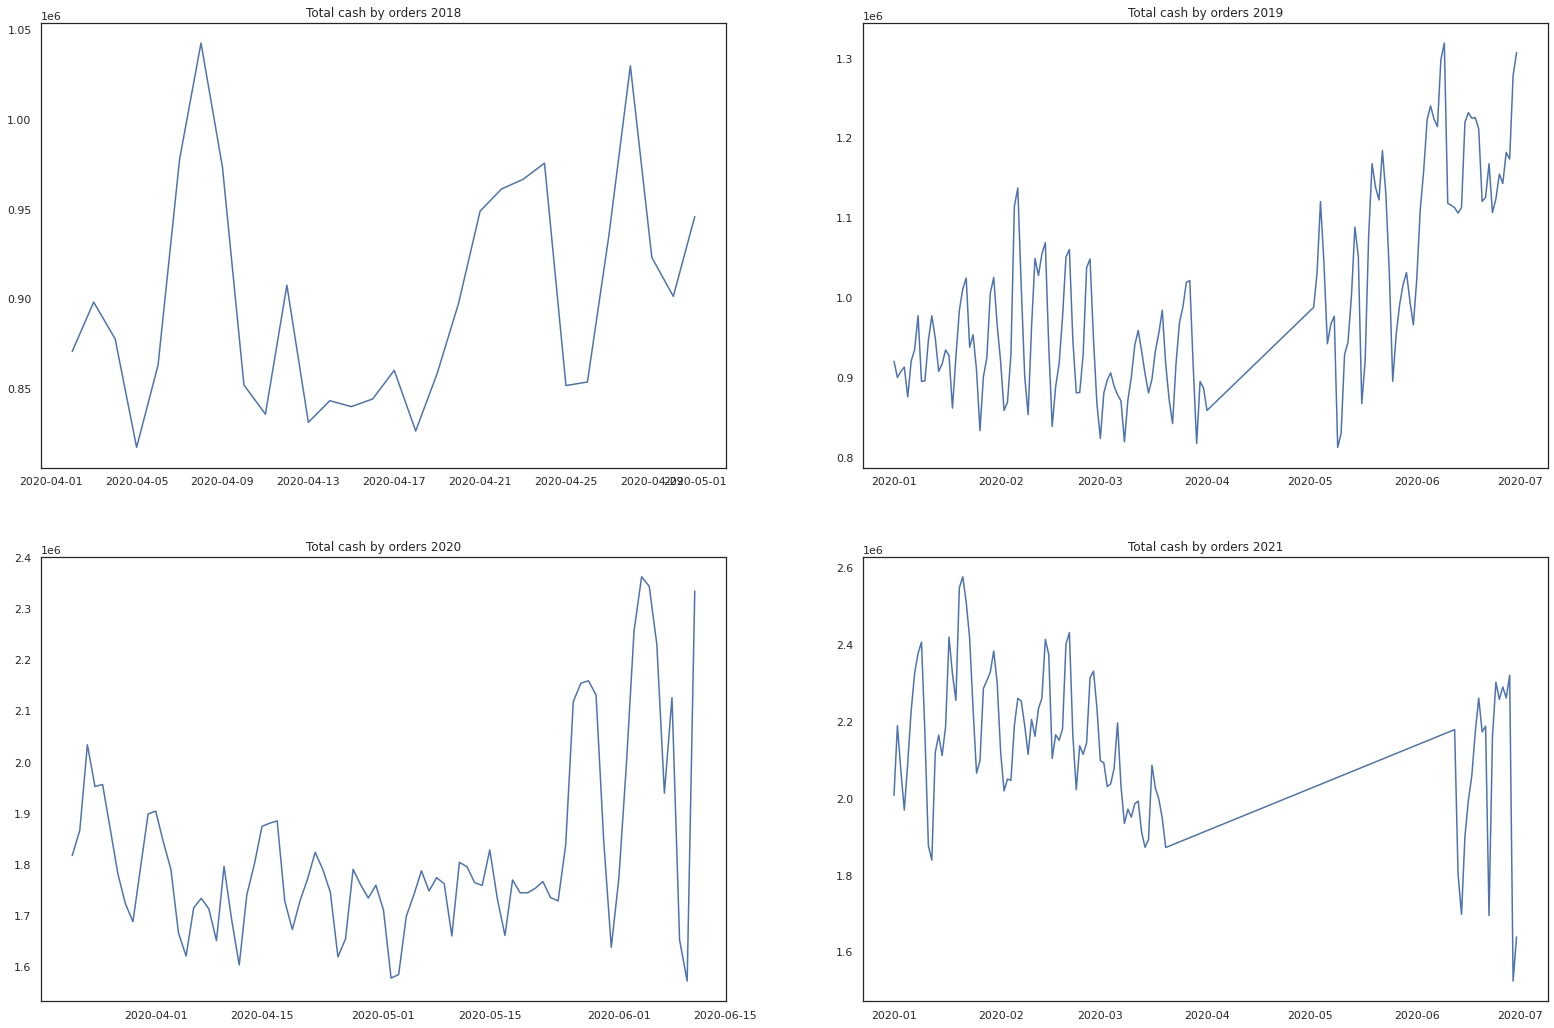

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize=(27,18))

plt.subplot(2,2,1)
plt.plot(pivot_TEX.index, pivot_TEX.Demand)
plt.title('Total cash by orders 2018')

plt.subplot(2,2,2)
plt.plot(pivot_TEX2.index, pivot_TEX2.Demand)
plt.title('Total cash by orders 2019')

plt.subplot(2,2,3)
plt.plot(pivot_MIDA.index, pivot_MIDA.Demand)
plt.title('Total cash by orders 2020')

plt.subplot(2,2,4)
plt.plot(pivot_MIDA2.index, pivot_MIDA2.Demand)
plt.title('Total cash by orders 2021')


In [ ]:
lockdown_TEX['HourB'] = pd.cut(lockdown_TEX.HourNum, 
                    bins=[0,4,8,12,16,20,24], 
                    include_lowest=True, 
                    labels=['Night','EarlyMorning','Morning','Noon','Afternoon','Evening'])
noLockdown_TEX['HourB'] = pd.cut(noLockdown_TEX.HourNum, 
                    bins=[0,4,8,12,16,20,24], 
                    include_lowest=True, 
                    labels=['Night','EarlyMorning','Morning','Noon','Afternoon','Evening'])
lockdown_MIDA['HourB'] = pd.cut(lockdown_MIDA.HourNum, 
                    bins=[0,4,8,12,16,20,24], 
                    include_lowest=True, 
                    labels=['Night','EarlyMorning','Morning','Noon','Afternoon','Evening'])
noLockdown_MIDA['HourB'] = pd.cut(noLockdown_MIDA.HourNum, 
                    bins=[0,4,8,12,16,20,24], 
                    include_lowest=True, 
                    labels=['Night','EarlyMorning','Morning','Noon','Afternoon','Evening'])
TEX_Lock['HourB'] = pd.cut(TEX_Lock.HourNum, 
                    bins=[0,4,8,12,16,20,24], 
                    include_lowest=True, 
                    labels=['Night','EarlyMorning','Morning','Noon','Afternoon','Evening'])
MIDA_Lock['HourB'] = pd.cut(MIDA_Lock.HourNum, 
                    bins=[0,4,8,12,16,20,24], 
                    include_lowest=True, 
                    labels=['Night','EarlyMorning','Morning','Noon','Afternoon','Evening'])
TEX_df['HourB'] = pd.cut(TEX_df.HourNum, 
                    bins=[0,4,8,12,16,20,24], 
                    include_lowest=True, 
                    labels=['Night','EarlyMorning','Morning','Noon','Afternoon','Evening'])
MIDA_df['HourB'] = pd.cut(MIDA_df.HourNum, 
                    bins=[0,4,8,12,16,20,24], 
                    include_lowest=True, 
                    labels=['Night','EarlyMorning','Morning','Noon','Afternoon','Evening'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
hour1 = lockdown_TEX.groupby(by= 'HourB').mean()
hour1 = hour1.nlargest(10, 'Demand')
hour1['Demand'] = hour1['Demand'].fillna(0).astype(int)
hour2 = noLockdown_TEX.groupby(by= 'HourB').mean()
hour2 = hour2.nlargest(10, 'Demand')
hour2['Demand'] = hour2['Demand'].fillna(0).astype(int)
hour3 = lockdown_MIDA.groupby(by= 'HourB').mean()
hour3 = hour3.nlargest(10, 'Demand')
hour3['Demand'] = hour3['Demand'].fillna(0).astype(int)
hour4 = noLockdown_MIDA.groupby(by= 'HourB').mean()
hour4 = hour4.nlargest(10, 'Demand')
hour4['Demand'] = hour4['Demand'].fillna(0).astype(int)
hour5 = TEX_df.groupby(by= 'HourB').mean()
hour5 = hour5.nlargest(10, 'Demand')
hour5['Demand'] = hour5['Demand'].fillna(0).astype(int)
hour6 = MIDA_Lock.groupby(by= 'HourB').mean()
hour6 = hour6.nlargest(10, 'Demand')
hour6['Demand'] = hour6['Demand'].fillna(0).astype(int)

In [ ]:
fig = go.Figure(go.Bar(
            x=hour1.Demand,
            y=hour1.index,
            orientation='h',marker_color='#7F003F' ,text=hour1.Demand,
    textposition='outside' ))
fig.update_layout(title={
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},titlefont_size=25,title_text='Demand by hour - TEX, Lockdown')
fig.update_traces(textfont_size=20,textangle=0,textposition="inside", cliponaxis=False)
fig.update_yaxes(tickfont_size=20,categoryorder='total ascending')
fig.update_xaxes(tickfont_size=20)
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=hour2.Demand,
            y=hour2.index,
            orientation='h',marker_color='#7F003F' ,text=hour2.Demand,
    textposition='outside' ))
fig.update_layout(title={
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},titlefont_size=25,title_text='Demand by hour - TEX, No lockdown')
fig.update_traces(textfont_size=20,textangle=0,textposition="inside", cliponaxis=False)
fig.update_yaxes(tickfont_size=20,categoryorder='total ascending')
fig.update_xaxes(tickfont_size=20)
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=hour5.Demand,
            y=hour5.index,
            orientation='h',marker_color='#7F003F' ,text=hour5.Demand,
    textposition='outside' ))
fig.update_layout(title={
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},titlefont_size=25,title_text='Demand by hour - TEX, Whole period')
fig.update_traces(textfont_size=20,textangle=0,textposition="inside", cliponaxis=False)
fig.update_yaxes(tickfont_size=20,categoryorder='total ascending')
fig.update_xaxes(tickfont_size=20)
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=hour3.Demand,
            y=hour3.index,
            orientation='h',marker_color='#7F003F' ,text=hour3.Demand,
    textposition='outside' ))
fig.update_layout(title={
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},titlefont_size=25,title_text='Demand by hour - MIDA, Lockdown')
fig.update_traces(textfont_size=20,textangle=0,textposition="inside", cliponaxis=False)
fig.update_yaxes(tickfont_size=20,categoryorder='total ascending')
fig.update_xaxes(tickfont_size=20)
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=hour4.Demand,
            y=hour4.index,
            orientation='h',marker_color='#7F003F' ,text=hour4.Demand,
    textposition='outside' ))
fig.update_layout(title={
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},titlefont_size=25,title_text='Demand by hour - MIDA, No lockdown')
fig.update_traces(textfont_size=20,textangle=0,textposition="inside", cliponaxis=False)
fig.update_yaxes(tickfont_size=20,categoryorder='total ascending')
fig.update_xaxes(tickfont_size=20)
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=hour6.Demand,
            y=hour6.index,
            orientation='h',marker_color='#7F003F' ,text=hour6.Demand,
    textposition='outside' ))
fig.update_layout(title={
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},titlefont_size=25,title_text='Demand by hour - MIDA, Whole period')
fig.update_traces(textfont_size=20,textangle=0,textposition="inside", cliponaxis=False)
fig.update_yaxes(tickfont_size=20,categoryorder='total ascending')
fig.update_xaxes(tickfont_size=20)
fig.show()

# T-test

In [ ]:
from scipy.stats import ttest_ind
from datetime import timedelta
import datetime
from scipy import stats

In [ ]:
lockdown_MIDA.reset_index(drop='index',inplace=True)
lockdown_TEX.reset_index(drop='index',inplace=True)
noLockdown_MIDA.reset_index(drop='index',inplace=True)
noLockdown_TEX.reset_index(drop='index',inplace=True)


In [ ]:
b = noLockdown_TEX[noLockdown_TEX.Date<'2020-04-02']
b = b[b.Date>'2020-03-03']
b=b.Demand.to_numpy()
a=lockdown_TEX.loc[:695]
a = a.Demand.to_numpy()
stat, p = stats.ttest_ind(a, b)
print('stat=%.4f, p=%.4f' % (stat, p))
  # טקסס חודש(29 יום כל הסגר) ראשון לעומת 29 יום לפני

stat=-2.1530, p=0.0315


In [ ]:
b = noLockdown_TEX[noLockdown_TEX.Date<'2020-04-02']
b = b[b.Date>'2020-03-25']
b=b.Demand.to_numpy()
a=lockdown_TEX.loc[:167]
a = a.Demand.to_numpy()
stat, p = stats.ttest_ind(a, b)
print('stat=%.4f, p=%.4f' % (stat, p))
# טקסס שבוע ראשון לעומת שבוע לפני

stat=-0.6451, p=0.5193


In [ ]:
b = noLockdown_MIDA[noLockdown_MIDA.Date<'2020-03-21']
b = b[b.Date>'2020-02-19']
b=b.Demand.to_numpy()
a=lockdown_MIDA.loc[:719]
a = a.Demand.to_numpy()
stat, p = stats.ttest_ind(a, b)
print('stat=%.4f, p=%.4f' % (stat, p))
# מידה חודש ראשון לעומת חודש לפני

stat=-31.1961, p=0.0000


In [ ]:
b = noLockdown_MIDA[noLockdown_MIDA.Date<'2020-03-21']
b = b[b.Date>'2020-03-13']
b=b.Demand.to_numpy()
a=lockdown_MIDA.loc[:167]
a = a.Demand.to_numpy()
stat, p = stats.ttest_ind(a, b)
print('stat=%.4f, p=%.4f' % (stat, p))
# מידה שבוע ראשון לעומת שבוע לפני

stat=-3.7617, p=0.0002


In [ ]:
Dumm = pd.get_dummies(lockdown_TEX.HourB)
lockdown_TEX = pd.concat([lockdown_TEX, Dumm], axis=1)
Dumm1 = pd.get_dummies(noLockdown_TEX.HourB)
noLockdown_TEX = pd.concat([noLockdown_TEX, Dumm1], axis=1)
Dumm2 = pd.get_dummies(lockdown_MIDA.HourB)
lockdown_MIDA = pd.concat([lockdown_MIDA, Dumm2], axis=1)
Dumm3 = pd.get_dummies(noLockdown_MIDA.HourB)
noLockdown_MIDA = pd.concat([noLockdown_MIDA, Dumm3], axis=1)
Dumm4 = pd.get_dummies(TEX_Lock.HourB)
TEX_Lock = pd.concat([TEX_Lock, Dumm4], axis=1)
Dumm5 = pd.get_dummies(MIDA_Lock.HourB)
MIDA_Lock = pd.concat([MIDA_Lock, Dumm5], axis=1)

# TEX - Regression model

##TEX during lockdown

In [ ]:
y = lockdown_TEX.Demand
X = lockdown_TEX.drop(['Demand','Total_Interchange','Date','Time','HourNum','HourB','lockdown','DemandForecast'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)
train_df.head(10)

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand
95,1,18.888889,0,0,0,0,0,1,33012.0
427,1,20.000000,0,0,0,0,1,0,42495.0
206,0,21.277778,0,0,0,1,0,0,38512.0
59,1,16.666667,0,0,1,0,0,0,39710.0
13,0,16.388889,0,0,0,1,0,0,39609.0
151,0,24.166667,0,1,0,0,0,0,36541.0
473,0,19.888889,0,0,0,0,1,0,49297.0
624,0,26.666667,1,0,0,0,0,0,36439.0
287,0,20.555556,0,0,0,0,0,1,33292.0
57,1,16.666667,0,0,1,0,0,0,37404.0


In [ ]:
train_df.describe()

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,0.257937,21.161927,0.158730,0.162698,0.154762,0.172619,0.170635,0.180556,37737.589286
std,0.437934,2.611986,0.365787,0.369457,0.362037,0.378293,0.376563,0.385032,5764.398202
min,0.000000,16.388889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27882.000000
25%,0.000000,19.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33372.250000
50%,0.000000,21.277778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36751.000000
75%,1.000000,23.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40796.500000
max,1.000000,26.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,55168.000000


In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()  
lm.fit(X_train,y_train)                 

coeff = lm.coef_
intercept = lm.intercept_
print('Coefficients: \n', "coeff =", coeff , ",  Intercept=",intercept,"\n" )
print("The regression equation is:" ,"Demand = " ,intercept," + ",coeff[0]," * ",X.columns[0],
      " + ",coeff[1]," * ",X.columns[1]," + ",coeff[2]," * ",X.columns[2]," + ",coeff[3]," * ",X.columns[3]," + ",coeff[4]," * ",X.columns[4]
      ," + ",coeff[5]," * ",X.columns[5]," + ",coeff[6]," * ",X.columns[6]," + ",coeff[7]," * ",X.columns[7])

Coefficients: 
 coeff = [-1790.8721243    620.75464572 -5468.96343618 -5379.19692134
  -731.80985887  4047.56225519  6015.62068344  1516.78727776] ,  Intercept= 24920.663062884574 

The regression equation is: Demand =  24920.663062884574  +  -1790.8721242961024  *  IsWeekend  +  620.7546457183337  *  temp  +  -5468.963436178538  *  Night  +  -5379.196921335195  *  EarlyMorning  +  -731.8098588714591  *  Morning  +  4047.5622551898987  *  Noon  +  6015.620683437458  *  Afternoon  +  1516.787277757839  *  Evening


In [ ]:
fitted_scaled_demand = lm.predict(X_train) 
predicted_train_demand = round(pd.Series(fitted_scaled_demand, index= y_train.index, name='predicted_train_demand'), ndigits =2)
train_df = pd.merge(left=train_df, right=predicted_train_demand, left_index=True, right_index=True)
train_df.head(10)

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand,predicted_train_demand
95,1,18.888889,0,0,0,0,0,1,33012.0,36371.94
427,1,20.000000,0,0,0,0,1,0,42495.0,41560.50
206,0,21.277778,0,0,0,1,0,0,38512.0,42176.50
59,1,16.666667,0,0,1,0,0,0,39710.0,32743.89
13,0,16.388889,0,0,0,1,0,0,39609.0,39141.70
151,0,24.166667,0,1,0,0,0,0,36541.0,34543.04
473,0,19.888889,0,0,0,0,1,0,49297.0,43282.40
624,0,26.666667,1,0,0,0,0,0,36439.0,36005.16
287,0,20.555556,0,0,0,0,0,1,33292.0,39197.41
57,1,16.666667,0,0,1,0,0,0,37404.0,32743.89


In [ ]:
fitted_scaled_price = lm.predict(X_test)
predicted_test_demand = round(pd.Series(fitted_scaled_price, index=y_test.index, name='Predicted_test_demand'),ndigits=2)
test_df = pd.merge(left=test_df, right=predicted_test_demand, left_index=True, right_index=True)
test_df

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand,Predicted_test_demand
146,0,24.166667,1,0,0,0,0,0,34296.0,34453.27
131,0,24.444444,0,0,1,0,0,0,41441.0,39362.86
650,0,24.333333,1,0,0,0,0,0,35415.0,34556.73
613,0,23.055556,0,0,0,1,0,0,44542.0,43280.07
355,0,17.777778,0,0,0,0,1,0,38004.0,41971.92
...,...,...,...,...,...,...,...,...,...,...
470,0,19.888889,0,0,0,1,0,0,47059.0,41314.35
675,0,21.944444,1,0,0,0,0,0,28137.0,33073.82
452,0,21.277778,0,0,0,0,0,1,43678.0,39645.73
40,0,18.333333,0,0,0,0,1,0,41587.0,42316.79


In [ ]:
print("Target function std:")
test_df.Demand.std()

Target function std:


5731.881512982973

In [ ]:
print("Target function std:")
train_df.Demand.std()

Target function std:


5764.398201737551

In [ ]:
from sklearn import metrics
print("------ TRAIN DATA ------")
print("RMSE:",np.sqrt(metrics.mean_squared_error(train_df.Demand, train_df.predicted_train_demand)))

------ TRAIN DATA ------
RMSE: 3092.341282290738


In [ ]:
print("------ TEST DATA ------")
print("RMSE:",np.sqrt(metrics.mean_squared_error(test_df.Demand, test_df.Predicted_test_demand)))


------ TEST DATA ------
RMSE: 3160.4718128867803


In [ ]:
from sklearn.metrics import r2_score
r2_score(train_df.Demand, train_df.predicted_train_demand)

0.7116437029664566

In [ ]:
r2_score(test_df.Demand, test_df.Predicted_test_demand)

0.6945608338471162

##TEX during no lockdown

In [ ]:
y = noLockdown_TEX.Demand
X = noLockdown_TEX.drop(['Demand','Total_Interchange','Date','Time','HourNum','HourB','lockdown','DemandForecast'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)
train_df.head(10)

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand
2786,0,26.111111,1,0,0,0,0,0,30218.0
638,0,13.888889,0,0,0,1,0,0,38137.0
2492,0,23.888889,0,0,0,0,0,1,47203.0
2189,0,16.111111,0,1,0,0,0,0,32922.0
287,1,6.388889,0,0,0,0,0,1,36325.0
1686,0,22.666667,0,1,0,0,0,0,36586.0
3492,0,28.333333,0,0,0,1,0,0,54041.0
2015,0,23.888889,1,0,0,0,0,0,34460.0
3282,0,29.055556,0,0,0,0,1,0,60167.0
582,1,16.388889,0,1,0,0,0,0,39971.0


In [ ]:
train_df.describe()

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand
count,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000
mean,0.284875,19.883882,0.156740,0.171630,0.168495,0.169671,0.164969,0.168495,41602.391458
std,0.451443,6.781898,0.363627,0.377133,0.374379,0.375417,0.371225,0.374379,7630.727230
min,0.000000,2.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27449.000000
25%,0.000000,14.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36553.500000
50%,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39955.500000
75%,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45212.750000
max,1.000000,31.111111,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67519.000000


In [ ]:
lm = LinearRegression()  
lm.fit(X_train,y_train)                 

coeff = lm.coef_
intercept = lm.intercept_
print('Coefficients: \n', "coeff =", coeff , ",  Intercept=",intercept,"\n" )
print("The regression equation is:" ,"Demand = " ,intercept," + ",coeff[0]," * ",X.columns[0],
      " + ",coeff[1]," * ",X.columns[1]," + ",coeff[2]," * ",X.columns[2]," + ",coeff[3]," * ",X.columns[3]," + ",coeff[4]," * ",X.columns[4]
      ," + ",coeff[5]," * ",X.columns[5]," + ",coeff[6]," * ",X.columns[6]," + ",coeff[7]," * ",X.columns[7] )

Coefficients: 
 coeff = [-2701.54610601   397.41327994 -6041.21979603 -4618.75930265
   453.16746759  3722.24318456  5348.10398417  1136.46446236] ,  Intercept= 34427.82119891354 

The regression equation is: Demand =  34427.82119891354  +  -2701.546106012188  *  IsWeekend  +  397.41327994208325  *  temp  +  -6041.21979602841  *  Night  +  -4618.759302654144  *  EarlyMorning  +  453.16746759359035  *  Morning  +  3722.243184557525  *  Noon  +  5348.103984171457  *  Afternoon  +  1136.4644623599813  *  Evening


In [ ]:
fitted_scaled_demand = lm.predict(X_train) 
predicted_train_demand = round(pd.Series(fitted_scaled_demand, index= y_train.index, name='predicted_train_demand'), ndigits =2)
train_df = pd.merge(left=train_df, right=predicted_train_demand, left_index=True, right_index=True)
train_df.head(10)

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand,predicted_train_demand
2786,0,26.111111,1,0,0,0,0,0,30218.0,38763.50
638,0,13.888889,0,0,0,1,0,0,38137.0,43669.69
2492,0,23.888889,0,0,0,0,0,1,47203.0,45058.05
2189,0,16.111111,0,1,0,0,0,0,32922.0,36211.83
287,1,6.388889,0,0,0,0,0,1,36325.0,35401.77
1686,0,22.666667,0,1,0,0,0,0,36586.0,38817.10
3492,0,28.333333,0,0,0,1,0,0,54041.0,49410.11
2015,0,23.888889,1,0,0,0,0,0,34460.0,37880.36
3282,0,29.055556,0,0,0,0,1,0,60167.0,51322.99
582,1,16.388889,0,1,0,0,0,0,39971.0,33620.68


In [ ]:
fitted_scaled_demand = lm.predict(X_test)
predicted_test_demand = round(pd.Series(fitted_scaled_demand, index=y_test.index, name='Predicted_test_demand'),ndigits=2)
test_df= pd.merge(left=test_df, right=predicted_test_demand, left_index=True, right_index=True)
test_df

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand,Predicted_test_demand
2029,0,23.888889,0,0,0,1,0,0,48546.0,47643.83
909,0,10.833333,0,0,0,0,0,1,39275.0,39869.60
3342,0,27.944444,0,1,0,0,0,0,41128.0,40914.56
292,0,11.277778,0,1,0,0,0,0,35815.0,34291.00
3138,0,31.111111,0,0,0,0,1,0,62423.0,52139.89
...,...,...,...,...,...,...,...,...,...,...
2310,0,23.500000,0,1,0,0,0,0,33551.0,39148.27
1155,0,11.111111,1,0,0,0,0,0,30476.0,32802.30
21,0,10.166667,0,0,0,0,0,1,39281.0,39604.65
3130,0,31.111111,0,0,1,0,0,0,59807.0,47244.96


In [ ]:
print("Target function std:")
test_df.Demand.std()

Target function std:


7600.221698911173

In [ ]:
print("Target function std:")
train_df.Demand.std()

Target function std:


7630.727229750418

In [ ]:
print("------ TRAIN DATA ------")

print("RMSE:",np.sqrt(metrics.mean_squared_error(train_df.Demand, train_df.predicted_train_demand)))


------ TRAIN DATA ------
RMSE: 5716.817797747971


In [ ]:
print("------ TEST DATA ------")

print("RMSE:",np.sqrt(metrics.mean_squared_error(test_df.Demand, test_df.Predicted_test_demand)))


------ TEST DATA ------
RMSE: 5717.869931534871


In [ ]:
r2_score(train_df.Demand, train_df.predicted_train_demand)

0.43850349877070904

In [ ]:
r2_score(test_df.Demand, test_df.Predicted_test_demand)

0.43348316613342963

## TEX full time

In [ ]:
y = TEX_Lock.Demand
X= TEX_Lock.drop(['Demand','Total_Interchange','Date','Time','HourNum','HourB','lockdown','DemandForecast'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)
train_df.head(10)

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand
2374,0,24.166667,0,0,0,0,0,1,40751.0
1922,1,13.888889,1,0,0,0,0,0,32573.0
273,1,6.388889,0,0,1,0,0,0,45211.0
1605,1,11.833333,0,0,0,0,0,1,37640.0
2316,0,22.388889,0,0,0,1,0,0,39429.0
220,0,13.888889,0,1,0,0,0,0,31542.0
823,0,20.555556,0,1,0,0,0,0,37957.0
4106,1,28.611111,1,0,0,0,0,0,36800.0
3302,1,25.277778,0,0,0,1,0,0,47480.0
252,1,8.055556,0,0,0,1,0,0,43016.0


In [ ]:
train_df.describe()

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand
count,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000
mean,0.291885,20.015125,0.166885,0.164921,0.167866,0.165249,0.167539,0.167539,40866.338024
std,0.454704,6.380466,0.372934,0.371170,0.373809,0.371466,0.373518,0.373518,7427.280134
min,0.000000,2.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27449.000000
25%,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35918.750000
50%,0.000000,20.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39405.500000
75%,1.000000,25.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44393.750000
max,1.000000,31.111111,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67792.000000


In [ ]:
lm = LinearRegression()  
lm.fit(X_train,y_train)                 

coeff = lm.coef_
intercept = lm.intercept_
print('Coefficients: \n', "coeff =", coeff , ",  Intercept=",intercept,"\n" )
print("The regression equation is:" ,"Demand = " ,intercept," + ",coeff[0]," * ",X.columns[0],
      " + ",coeff[1]," * ",X.columns[1]," + ",coeff[2]," * ",X.columns[2]," + ",coeff[3]," * ",X.columns[3]," + ",coeff[4]," * ",X.columns[4]
      ," + ",coeff[5]," * ",X.columns[5]," + ",coeff[6]," * ",X.columns[6]," + ",coeff[7]," * ",X.columns[7] )

Coefficients: 
 coeff = [-2375.40249952   374.82604602 -5957.78000472 -4594.21727733
   307.3558658   3805.86483193  5102.00778998  1336.76879434] ,  Intercept= 34050.1829856203 

The regression equation is: Demand =  34050.1829856203  +  -2375.4024995210725  *  IsWeekend  +  374.82604601526873  *  temp  +  -5957.780004723361  *  Night  +  -4594.217277328832  *  EarlyMorning  +  307.35586579655904  *  Morning  +  3805.8648319314407  *  Noon  +  5102.007789984057  *  Afternoon  +  1336.7687943401393  *  Evening


In [ ]:
fitted_scaled_demand = lm.predict(X_train) 
predicted_train_demand = round(pd.Series(fitted_scaled_demand, index= y_train.index, name='predicted_train_demand'), ndigits =2)
train_df = pd.merge(left=train_df, right=predicted_train_demand, left_index=True, right_index=True)
train_df.head(10)

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand,predicted_train_demand
2374,0,24.166667,0,0,0,0,0,1,40751.0,44445.25
1922,1,13.888889,1,0,0,0,0,0,32573.0,30922.92
273,1,6.388889,0,0,1,0,0,0,45211.0,34376.86
1605,1,11.833333,0,0,0,0,0,1,37640.0,37446.99
2316,0,22.388889,0,0,0,1,0,0,39429.0,46247.99
220,0,13.888889,0,1,0,0,0,0,31542.0,34661.88
823,0,20.555556,0,1,0,0,0,0,37957.0,37160.72
4106,1,28.611111,1,0,0,0,0,0,36800.0,36441.19
3302,1,25.277778,0,0,0,1,0,0,47480.0,44955.41
252,1,8.055556,0,0,0,1,0,0,43016.0,38500.08


In [ ]:
fitted_scaled_demand = lm.predict(X_test)
predicted_test_demand = round(pd.Series(fitted_scaled_demand, index=y_test.index, name='Predicted_test_demand'),ndigits=2)
test_df= pd.merge(left=test_df, right=predicted_test_demand, left_index=True, right_index=True)
test_df

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand,Predicted_test_demand
1895,0,16.277778,1,0,0,0,0,0,36489.0,34193.74
4268,0,28.500000,0,0,0,0,0,1,50715.0,46069.49
201,0,13.777778,0,0,1,0,0,0,38881.0,39521.81
1438,1,15.000000,0,0,0,0,0,1,34665.0,38633.94
1879,0,20.277778,0,0,1,0,0,0,38533.0,41958.18
...,...,...,...,...,...,...,...,...,...,...
3499,0,25.000000,0,0,0,0,0,1,41870.0,44757.60
797,0,16.111111,0,1,0,0,0,0,33414.0,35494.83
3102,1,23.888889,0,1,0,0,0,0,29461.0,36034.74
3714,0,26.833333,0,0,0,0,1,0,56624.0,49210.02


In [ ]:
test_df.std()

IsWeekend                   0.444535
temp                        6.212674
Night                       0.372479
EarlyMorning                0.376532
Morning                     0.370414
Noon                        0.375863
Afternoon                   0.371105
Evening                     0.370414
Demand                   7662.568422
Predicted_test_demand    4885.794229
dtype: float64

In [ ]:
print("Target function std:")
test_df.Demand.std()

Target function std:


7662.568422472889

In [ ]:
print("Target function std:")
train_df.Demand.std()

Target function std:


7427.280134059461

In [ ]:
print("------ TRAIN DATA ------")

print("RMSE:",np.sqrt(metrics.mean_squared_error(train_df.Demand, train_df.predicted_train_demand)))


------ TRAIN DATA ------
RMSE: 5641.276027073224


In [ ]:
print("------ TEST DATA ------")

print("RMSE:",np.sqrt(metrics.mean_squared_error(test_df.Demand, test_df.Predicted_test_demand)))


------ TEST DATA ------
RMSE: 5678.39531276256


In [ ]:
r2_score(train_df.Demand, train_df.predicted_train_demand)

0.42291840051790364

In [ ]:
r2_score(test_df.Demand, test_df.Predicted_test_demand)

0.4504162134722086

# MIDA - Regression model

## MIDA during lockdown

In [ ]:
y = lockdown_MIDA.Demand
X = lockdown_MIDA.drop(['Demand','Total_Interchange','Date','Time','HourNum','HourB','lockdown','DemandForecast'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)
train_df.head(10)

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand
227,0,9.444444,0,0,1,0,0,0,79582.0
1438,0,20.000000,0,0,0,0,0,1,69669.0
485,0,11.000000,0,1,0,0,0,0,73587.0
390,0,14.444444,0,1,0,0,0,0,70576.0
60,0,8.055556,0,0,0,1,0,0,92673.0
435,0,14.444444,1,0,0,0,0,0,61669.0
376,1,13.888889,0,0,0,0,1,0,68643.0
348,1,12.500000,0,0,0,1,0,0,71171.0
302,0,4.888889,0,0,0,1,0,0,75524.0
33,1,7.500000,0,0,1,0,0,0,79906.0


In [ ]:
train_df.describe()

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand
count,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
mean,0.297903,14.701976,0.169197,0.170644,0.174982,0.166305,0.160521,0.158351,76409.746204
std,0.457502,5.066912,0.375062,0.376333,0.380089,0.372489,0.367221,0.365202,10698.862465
min,0.000000,4.888889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58480.000000
25%,0.000000,10.444444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69427.500000
50%,0.000000,13.888889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75293.000000
75%,1.000000,18.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79284.000000
max,1.000000,27.222222,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,119640.000000


In [ ]:
lm = LinearRegression()  
lm.fit(X_train,y_train)                 

coeff = lm.coef_
intercept = lm.intercept_
print('Coefficients: \n', "coeff =", coeff , ",  Intercept=",intercept,"\n" )
print("The regression equation is:" ,"Demand = " ,intercept," + ",coeff[0]," * ",X.columns[0],
      " + ",coeff[1]," * ",X.columns[1]," + ",coeff[2]," * ",X.columns[2]," + ",coeff[3]," * ",X.columns[3]," + ",coeff[4]," * ",X.columns[4]
      ," + ",coeff[5]," * ",X.columns[5]," + ",coeff[6]," * ",X.columns[6]," + ",coeff[7]," * ",X.columns[7])

Coefficients: 
 coeff = [-6221.31690558   726.46613145 -8020.42686796 -5755.88393124
  1976.83791229  4257.05120082  5441.16793785  2101.25374824] ,  Intercept= 67661.81119508637 

The regression equation is: Demand =  67661.81119508637  +  -6221.31690558349  *  IsWeekend  +  726.4661314527951  *  temp  +  -8020.4268679579955  *  Night  +  -5755.88393123968  *  EarlyMorning  +  1976.837912293592  *  Morning  +  4257.051200815318  *  Noon  +  5441.167937852708  *  Afternoon  +  2101.2537482360635  *  Evening


In [ ]:
fitted_scaled_demand = lm.predict(X_train) 
predicted_train_demand = round(pd.Series(fitted_scaled_demand, index=y_train.index, name='predicted_train_demand'), ndigits =2)
train_df = pd.merge(left=train_df, right=predicted_train_demand, left_index=True, right_index=True)
train_df.head(10)

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand,predicted_train_demand
227,0,9.444444,0,0,1,0,0,0,79582.0,76499.72
1438,0,20.000000,0,0,0,0,0,1,69669.0,84292.39
485,0,11.000000,0,1,0,0,0,0,73587.0,69897.05
390,0,14.444444,0,1,0,0,0,0,70576.0,72399.33
60,0,8.055556,0,0,0,1,0,0,92673.0,77770.95
435,0,14.444444,1,0,0,0,0,0,61669.0,70134.78
376,1,13.888889,0,0,0,0,1,0,68643.0,76971.47
348,1,12.500000,0,0,0,1,0,0,71171.0,74778.37
302,0,4.888889,0,0,0,1,0,0,75524.0,75470.47
33,1,7.500000,0,0,1,0,0,0,79906.0,68865.83


In [ ]:
fitted_scaled_demand = lm.predict(X_test)
Predicted_test_demand = round(pd.Series(fitted_scaled_demand,index=y_test.index, name='Predicted_test_demand'),ndigits=2)
test_df = pd.merge(left=test_df, right=Predicted_test_demand, left_index=True, right_index=True)
test_df

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand,Predicted_test_demand
927,0,16.277778,0,0,0,0,1,0,74167.0,84928.23
1547,1,16.388889,0,0,0,1,0,0,75152.0,77603.52
21,1,11.388889,0,0,0,0,0,1,81931.0,71815.39
220,0,9.444444,0,1,0,0,0,0,63817.0,68767.00
154,0,15.277778,0,0,1,0,0,0,78156.0,80737.44
...,...,...,...,...,...,...,...,...,...,...
418,0,16.000000,0,0,1,0,0,0,75094.0,81262.11
637,0,7.500000,0,0,0,1,0,0,78112.0,77367.36
1199,1,11.388889,1,0,0,0,0,0,71465.0,61693.71
147,0,15.277778,1,0,0,0,0,0,66465.0,70740.17


In [ ]:
test_df.std()

IsWeekend                    0.447441
temp                         4.956066
Night                        0.371478
EarlyMorning                 0.368409
Morning                      0.358852
Noon                         0.368409
Afternoon                    0.377452
Evening                      0.391482
Demand                   10111.712725
Predicted_test_demand     6636.460650
dtype: float64

In [ ]:
print("Target function std:")
test_df.Demand.std()

Target function std:


10111.712724528656

In [ ]:
print("Target function std:")
train_df.Demand.std()

Target function std:


10698.862464585654

In [ ]:
print("------ TRAIN DATA ------")

print("RMSE:",np.sqrt(metrics.mean_squared_error(train_df.Demand, train_df.predicted_train_demand)))


------ TRAIN DATA ------
RMSE: 8141.032336669759


In [ ]:
print("------ TEST DATA ------")

print("RMSE:",np.sqrt(metrics.mean_squared_error(test_df.Demand, test_df.Predicted_test_demand)))


------ TEST DATA ------
RMSE: 7631.599210496492


In [ ]:
r2_score(train_df.Demand, train_df.predicted_train_demand)

0.4205741221939143

In [ ]:
r2_score(test_df.Demand, test_df.Predicted_test_demand)

0.4294241118319917

##MIDA during no lockdown

In [ ]:
y = noLockdown_MIDA.Demand
X = noLockdown_MIDA.drop(['Demand','Total_Interchange','Date','Time','HourNum','HourB','lockdown','DemandForecast'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)
train_df.head(10)

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand
1711,0,11.833333,0,0,1,0,0,0,91466.0
2339,0,26.388889,0,1,0,0,0,0,79904.0
1733,0,10.000000,0,1,0,0,0,0,79762.0
1955,1,20.000000,0,0,0,1,0,0,77867.0
2048,0,20.166667,0,0,1,0,0,0,84409.0
25,0,5.722222,1,0,0,0,0,0,82104.0
2209,0,23.611111,0,0,1,0,0,0,97700.0
2065,0,22.388889,1,0,0,0,0,0,71164.0
2073,0,22.388889,0,0,1,0,0,0,92378.0
2051,0,20.166667,0,0,0,1,0,0,93572.0


In [ ]:
train_df.describe()

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand
count,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000
mean,0.278250,7.482280,0.160996,0.170109,0.167679,0.164642,0.167072,0.169502,90178.564752
std,0.448274,8.381595,0.367639,0.375843,0.373695,0.370969,0.373153,0.375309,10277.375502
min,0.000000,-2.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60885.000000
25%,0.000000,2.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83189.500000
50%,0.000000,4.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89851.500000
75%,1.000000,9.444444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97040.750000
max,1.000000,27.777778,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,120097.000000


In [ ]:
lm = LinearRegression()  
lm.fit(X_train,y_train)                 

coeff = lm.coef_
intercept = lm.intercept_
print('Coefficients: \n', "coeff =", coeff , ",  Intercept=",intercept,"\n" )
print("The regression equation is:" ,"Demand = " ,intercept," + ",coeff[0]," * ",X.columns[0],
      " + ",coeff[1]," * ",X.columns[1]," + ",coeff[2]," * ",X.columns[2]," + ",coeff[3]," * ",X.columns[3]," + ",coeff[4]," * ",X.columns[4]
      ," + ",coeff[5]," * ",X.columns[5]," + ",coeff[6]," * ",X.columns[6]," + ",coeff[7]," * ",X.columns[7])

Coefficients: 
 coeff = [-4464.85224171  -172.12133663 -8886.85101544 -3722.41918077
  3426.65987704  2364.28262429  5505.12238454  1313.20531035] ,  Intercept= 92666.5606549075 

The regression equation is: Demand =  92666.5606549075  +  -4464.8522417085305  *  IsWeekend  +  -172.12133662785578  *  temp  +  -8886.851015435548  *  Night  +  -3722.419180773662  *  EarlyMorning  +  3426.659877035558  *  Morning  +  2364.2826242915444  *  Noon  +  5505.122384535991  *  Afternoon  +  1313.2053103461096  *  Evening


In [ ]:
fitted_scaled_demand = lm.predict(X_train) 
predicted_train_demand = round(pd.Series(fitted_scaled_demand, index= y_train.index, name='predicted_train_demand'), ndigits =2)
train_df = pd.merge(left=train_df, right=predicted_train_demand, left_index=True, right_index=True)
train_df.head(10)

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand,predicted_train_demand
1711,0,11.833333,0,0,1,0,0,0,91466.0,94056.45
2339,0,26.388889,0,1,0,0,0,0,79904.0,84402.05
1733,0,10.000000,0,1,0,0,0,0,79762.0,87222.93
1955,1,20.000000,0,0,0,1,0,0,77867.0,87123.56
2048,0,20.166667,0,0,1,0,0,0,84409.0,92622.11
25,0,5.722222,1,0,0,0,0,0,82104.0,82794.79
2209,0,23.611111,0,0,1,0,0,0,97700.0,92029.24
2065,0,22.388889,1,0,0,0,0,0,71164.0,79926.10
2073,0,22.388889,0,0,1,0,0,0,92378.0,92239.62
2051,0,20.166667,0,0,0,1,0,0,93572.0,91559.73


In [ ]:
fitted_scaled_demand = lm.predict(X_test)
predicted_test_demand = round(pd.Series(fitted_scaled_demand, index=y_test.index, name='Predicted_test_demand'),ndigits=2)
test_df = pd.merge(left=test_df, right=predicted_test_demand, left_index=True, right_index=True)
test_df

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand,Predicted_test_demand
873,0,3.611111,0,0,1,0,0,0,99568.000000,95471.67
361,0,5.277778,1,0,0,0,0,0,77338.000000,82871.29
235,0,4.166667,0,0,0,0,1,0,91846.000000,97454.51
1343,0,8.500000,0,0,0,0,0,1,81971.000000,92516.73
1609,1,4.888889,1,0,0,0,0,0,84210.505409,78473.38
...,...,...,...,...,...,...,...,...,...,...
641,0,3.055556,0,0,0,0,1,0,101343.000000,97645.76
89,1,5.833333,0,0,0,0,1,0,90329.000000,92702.79
240,1,7.944444,1,0,0,0,0,0,76999.000000,77947.45
1660,0,11.944444,0,1,0,0,0,0,73767.000000,86888.25


In [ ]:
test_df.std()

IsWeekend                    0.459321
temp                         8.289534
Night                        0.389021
EarlyMorning                 0.370816
Morning                      0.375874
Noon                         0.369527
Afternoon                    0.360218
Evening                      0.370816
Demand                   10612.745040
Predicted_test_demand     5548.235934
dtype: float64

In [ ]:
print("Target function std:")
test_df.Demand.std()

Target function std:


10612.745040190599

In [ ]:
print("Target function std:")
train_df.Demand.std()

Target function std:


10277.37550216334

In [ ]:
print("------ TRAIN DATA ------")

print("RMSE:",np.sqrt(metrics.mean_squared_error(train_df.Demand, train_df.predicted_train_demand)))


------ TRAIN DATA ------
RMSE: 8699.55578822462


In [ ]:
print("------ TEST DATA ------")

print("RMSE:",np.sqrt(metrics.mean_squared_error(test_df.Demand, test_df.Predicted_test_demand)))


------ TEST DATA ------
RMSE: 8865.717213426185


In [ ]:
r2_score(train_df.Demand, train_df.predicted_train_demand)

0.28304213304308523

In [ ]:
r2_score(test_df.Demand, test_df.Predicted_test_demand)

0.3011437209191611

##MIDA full time

In [ ]:
y = MIDA_Lock.Demand
X = MIDA_Lock.drop(['Demand','Total_Interchange','Date','Time','HourNum','HourB','lockdown','DemandForecast'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)
train_df.head(10)

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand
4169,0,22.777778,0,0,0,1,0,0,119694.0
1763,1,7.944444,0,0,0,1,0,0,79698.0
1084,1,-2.222222,0,1,0,0,0,0,99647.0
1158,0,1.555556,0,1,0,0,0,0,93056.0
756,1,1.111111,0,0,0,1,0,0,89631.0
4319,0,26.388889,0,1,0,0,0,0,88290.0
1422,1,-1.111111,0,1,0,0,0,0,94271.0
1238,0,-1.666667,0,0,0,1,0,0,96689.0
3898,0,21.833333,1,0,0,0,0,0,75076.0
1745,0,10.000000,0,0,0,0,1,0,80603.0


In [ ]:
train_df.describe()

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand
count,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000
mean,0.293399,10.721544,0.166337,0.168647,0.168977,0.167987,0.162046,0.166007,83863.516360
std,0.455395,7.902885,0.372444,0.374502,0.374793,0.373916,0.368554,0.372148,12494.384754
min,0.000000,-2.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58480.000000
25%,0.000000,3.611111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74775.750000
50%,0.000000,9.888889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82304.500000
75%,1.000000,16.388889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92823.250000
max,1.000000,27.777778,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,119768.000000


In [ ]:
lm = LinearRegression()  
lm.fit(X_train,y_train)                 

coeff = lm.coef_
intercept = lm.intercept_
print('Coefficients: \n', "coeff =", coeff , ",  Intercept=",intercept,"\n" )
print("The regression equation is:" ,"Demand = " ,intercept," + ",coeff[0]," * ",X.columns[0],
      " + ",coeff[1]," * ",X.columns[1]," + ",coeff[2]," * ",X.columns[2]," + ",coeff[3]," * ",X.columns[3]," + ",coeff[4]," * ",X.columns[4]
      ," + ",coeff[5]," * ",X.columns[5]," + ",coeff[6]," * ",X.columns[6]," + ",coeff[7]," * ",X.columns[7])

Coefficients: 
 coeff = [-5410.08165046  -379.28891652 -8346.01508249 -4825.45989665
  3141.55661885  2978.78985769  5554.74518348  1496.38331913] ,  Intercept= 89539.6574737353 

The regression equation is: Demand =  89539.6574737353  +  -5410.081650456162  *  IsWeekend  +  -379.28891652027403  *  temp  +  -8346.015082491782  *  Night  +  -4825.45989664945  *  EarlyMorning  +  3141.556618845238  *  Morning  +  2978.789857685432  *  Noon  +  5554.745183481436  *  Afternoon  +  1496.383319129139  *  Evening


In [ ]:
fitted_scaled_demand = lm.predict(X_train) 
predicted_train_demand = round(pd.Series(fitted_scaled_demand, index= y_train.index, name='predicted_train_demand'), ndigits =2)
train_df = pd.merge(left=train_df, right=predicted_train_demand, left_index=True, right_index=True)
train_df.head(10)

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand,predicted_train_demand
4169,0,22.777778,0,0,0,1,0,0,119694.0,83879.09
1763,1,7.944444,0,0,0,1,0,0,79698.0,84095.13
1084,1,-2.222222,0,1,0,0,0,0,99647.0,80146.98
1158,0,1.555556,0,1,0,0,0,0,93056.0,84124.19
756,1,1.111111,0,0,0,1,0,0,89631.0,86686.93
4319,0,26.388889,0,1,0,0,0,0,88290.0,74705.18
1422,1,-1.111111,0,1,0,0,0,0,94271.0,79725.55
1238,0,-1.666667,0,0,0,1,0,0,96689.0,93150.60
3898,0,21.833333,1,0,0,0,0,0,75076.0,72912.50
1745,0,10.000000,0,0,0,0,1,0,80603.0,91301.51


In [ ]:
fitted_scaled_demand = lm.predict(X_test)
predicted_test_demand = round(pd.Series(fitted_scaled_demand, index=y_test.index, name='Predicted_test_demand'),ndigits=2)
test_df = pd.merge(left=test_df, right=predicted_test_demand, left_index=True, right_index=True)
test_df

,IsWeekend,temp,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,Demand,Predicted_test_demand
3495,0,17.944444,0,0,0,0,1,0,90823.0,88288.27
3418,0,21.833333,0,0,0,1,0,0,79558.0,84237.31
462,0,-1.388889,0,1,0,0,0,0,108092.0,85240.99
1824,0,6.666667,1,0,0,0,0,0,77368.0,78665.05
1545,0,3.055556,0,0,1,0,0,0,91406.0,91522.28
...,...,...,...,...,...,...,...,...,...,...
2904,0,13.611111,1,0,0,0,0,0,65201.0,76031.10
2834,0,16.277778,0,1,0,0,0,0,67488.0,78540.22
1212,0,-0.833333,0,0,0,1,0,0,101306.0,92834.52
3252,0,20.833333,0,0,0,1,0,0,82880.0,84616.59


In [ ]:
test_df.std()

IsWeekend                    0.446986
temp                         7.845669
Night                        0.377908
EarlyMorning                 0.373166
Morning                      0.372477
Noon                         0.363255
Afternoon                    0.372477
Evening                      0.377239
Demand                   12441.255877
Predicted_test_demand     6069.223217
dtype: float64

In [ ]:
print("Target function std:")
test_df.Demand.std()

Target function std:


12441.255876936946

In [ ]:
print("Target function std:")
train_df.Demand.std()

Target function std:


12494.384754412513

In [ ]:
print("------ TRAIN DATA ------")

print("RMSE:",np.sqrt(metrics.mean_squared_error(train_df.Demand, train_df.predicted_train_demand)))


------ TRAIN DATA ------
RMSE: 10740.283486200668


In [ ]:
print("------ TEST DATA ------")

print("RMSE:",np.sqrt(metrics.mean_squared_error(test_df.Demand, test_df.Predicted_test_demand)))


------ TEST DATA ------
RMSE: 10970.451207250804


In [ ]:
r2_score(train_df.Demand, train_df.predicted_train_demand)

0.26082870490107246

In [ ]:
r2_score(test_df.Demand, test_df.Predicted_test_demand)

0.221864920301989

# TEX - Random Forest model

##TEX during lockdown

In [ ]:
import requests, io 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor 

In [ ]:
Y = lockdown_TEX.Demand
x = lockdown_TEX.drop(['Demand','Total_Interchange','Date','Time','HourNum','HourB','lockdown','DemandForecast'], axis=1)
x_list = list(x.columns)
x = np.array(x)

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state = 28)

In [ ]:
model = RandomForestRegressor(n_estimators = 100,max_depth=3, random_state = 0)
model.fit(x_train, Y_train)

RandomForestRegressor(max_depth=3, random_state=0)

In [ ]:
print("Target function std:")
Y_train.std()

Target function std:


5815.0242785381315

In [ ]:
print("Target function std:")
Y_test.std()

Target function std:


5556.1357800482665

In [ ]:
Y_pred_train = model.predict(x_train)
print("------ TRAIN DATA ------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train)))

------ TRAIN DATA ------
RMSE: 2808.2124635152027


In [ ]:
Y_pred_test = model.predict(x_test)
print("------ TEST DATA ------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test)))

------ TEST DATA ------
RMSE: 3040.966954977583


In [ ]:
r2_score(Y_train, Y_pred_train)

0.7663792041002283

In [ ]:
r2_score(Y_test,Y_pred_test)

0.6983494263841286

In [ ]:
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp                 Importance: 0.23
Variable: Afternoon            Importance: 0.19
Variable: EarlyMorning         Importance: 0.17
Variable: Night                Importance: 0.16
Variable: Noon                 Importance: 0.15
Variable: Evening              Importance: 0.1
Variable: IsWeekend            Importance: 0.01
Variable: Morning              Importance: 0.0


##TEX during no lockdown

In [ ]:
Y = noLockdown_TEX.Demand
x = noLockdown_TEX.drop(['Demand','Total_Interchange','Date','Time','HourNum','HourB','lockdown','DemandForecast'], axis=1)
x_list = list(x.columns)
x = np.array(x)

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state = 28)
model = RandomForestRegressor(n_estimators = 100,max_depth=6, random_state = 0)
model.fit(x_train, Y_train)

RandomForestRegressor(max_depth=6, random_state=0)

In [ ]:
print("Target function std:")
Y_train.std()

Target function std:


7568.562002352372

In [ ]:
print("Target function std:")
Y_test.std()

Target function std:


7830.536754889962

In [ ]:
Y_pred_train = model.predict(x_train)
print("------ TRAIN DATA ------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train)))

------ TRAIN DATA ------
RMSE: 3334.8356815642805


In [ ]:
Y_pred_test = model.predict(x_test)
print("------ TEST DATA ------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test)))

------ TEST DATA ------
RMSE: 3432.5417038991336


In [ ]:
r2_score(Y_train, Y_pred_train)

0.8057902439839607

In [ ]:

r2_score(Y_test,Y_pred_test)

0.8075827905821524

In [ ]:
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp                 Importance: 0.48
Variable: Night                Importance: 0.12
Variable: Noon                 Importance: 0.09
Variable: Afternoon            Importance: 0.09
Variable: EarlyMorning         Importance: 0.08
Variable: Morning              Importance: 0.05
Variable: Evening              Importance: 0.05
Variable: IsWeekend            Importance: 0.04


##TEX full time

In [ ]:
Y = TEX_Lock.Demand
x = TEX_Lock.drop(['Demand','Total_Interchange','Date','Time','HourNum','HourB','lockdown','DemandForecast'], axis=1)
x_list = list(x.columns)
x = np.array(x)

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state = 28)
model = RandomForestRegressor(n_estimators = 100,max_depth=7, random_state = 0)
model.fit(x_train, Y_train)

RandomForestRegressor(max_depth=7, random_state=0)

In [ ]:
print("Target function std:")
Y_train.std()

Target function std:


7443.216163093873

In [ ]:
print("Target function std:")
Y_test.std()

Target function std:


7715.982143900134

In [ ]:
Y_pred_train = model.predict(x_train)
print("------ TRAIN DATA ------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train)))

------ TRAIN DATA ------
RMSE: 3140.098722320048


In [ ]:
Y_pred_test = model.predict(x_test)
print("------ TEST DATA ------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test)))

------ TEST DATA ------
RMSE: 3248.8884945110244


In [ ]:
r2_score(Y_train, Y_pred_train)

0.821971434938472

In [ ]:
r2_score(Y_test,Y_pred_test)

0.8225057153289383

In [ ]:
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp                 Importance: 0.48
Variable: Night                Importance: 0.16
Variable: EarlyMorning         Importance: 0.13
Variable: Morning              Importance: 0.06
Variable: Evening              Importance: 0.05
Variable: Noon                 Importance: 0.04
Variable: Afternoon            Importance: 0.04
Variable: IsWeekend            Importance: 0.03


# MIDA - Random Forest model

##MIDA during lockdown

In [ ]:
Y = lockdown_MIDA.Demand
x = lockdown_MIDA.drop(['Demand','Total_Interchange','Date','Time','HourNum','HourB','lockdown','DemandForecast'], axis=1)
x_list = list(x.columns)
x = np.array(x)

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state = 28)
model = RandomForestRegressor(n_estimators = 100,max_depth=6, random_state = 0)
model.fit(x_train, Y_train)

RandomForestRegressor(max_depth=6, random_state=0)

In [ ]:
print("Target function std:")
Y_train.std()

Target function std:


10705.274099414215

In [ ]:
print("Target function std:")
Y_test.std()

Target function std:


9764.422746543676

In [ ]:
Y_pred_train = model.predict(x_train)
print("------ TRAIN DATA ------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train)))

------ TRAIN DATA ------
RMSE: 4931.99675877092


In [ ]:
Y_pred_test = model.predict(x_test)
print("------ TEST DATA ------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test)))

------ TEST DATA ------
RMSE: 5366.00721305177


In [ ]:
r2_score(Y_train, Y_pred_train)

0.7876145480508335

In [ ]:
r2_score(Y_test,Y_pred_test)

0.6972337602824183

In [ ]:
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp                 Importance: 0.52
Variable: Night                Importance: 0.18
Variable: EarlyMorning         Importance: 0.16
Variable: IsWeekend            Importance: 0.08
Variable: Morning              Importance: 0.02
Variable: Afternoon            Importance: 0.02
Variable: Noon                 Importance: 0.01
Variable: Evening              Importance: 0.01


##MIDA during no lockdown

In [ ]:
Y = noLockdown_MIDA.Demand
x = noLockdown_MIDA.drop(['Demand','Total_Interchange','Date','Time','HourNum','HourB','lockdown','DemandForecast'], axis=1)
x_list = list(x.columns)
x = np.array(x)

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state = 28)
model = RandomForestRegressor(n_estimators = 100,max_depth=6, random_state = 0)
model.fit(x_train, Y_train)

RandomForestRegressor(max_depth=6, random_state=0)

In [ ]:
print("Target function std:")
Y_train.std()

Target function std:


10332.659324272543

In [ ]:
print("Target function std:")
Y_test.std()

Target function std:


10520.307722429572

In [ ]:
Y_pred_train = model.predict(x_train)
print("------ TRAIN DATA ------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train)))

------ TRAIN DATA ------
RMSE: 5316.831536694493


In [ ]:
Y_pred_test = model.predict(x_test)
print("------ TEST DATA ------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test)))

------ TEST DATA ------
RMSE: 5669.398636575366


In [ ]:
r2_score(Y_train, Y_pred_train)

0.73508135504467

In [ ]:
r2_score(Y_test,Y_pred_test)

0.7089683962401789

In [ ]:
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp                 Importance: 0.52
Variable: Night                Importance: 0.2
Variable: EarlyMorning         Importance: 0.15
Variable: IsWeekend            Importance: 0.08
Variable: Morning              Importance: 0.02
Variable: Evening              Importance: 0.02
Variable: Noon                 Importance: 0.01
Variable: Afternoon            Importance: 0.01


##MIDA full time

In [ ]:
Y = MIDA_Lock.Demand
x = MIDA_Lock.drop(['Demand','Total_Interchange','Date','Time','HourNum','HourB','lockdown','DemandForecast'], axis=1)
x_list = list(x.columns)
x = np.array(x)

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state = 28)
model = RandomForestRegressor(n_estimators = 100,max_depth=6, random_state = 0)
model.fit(x_train, Y_train)

RandomForestRegressor(max_depth=6, random_state=0)

In [ ]:
print("Target function std:")
Y_train.std()

Target function std:


12518.500830732577

In [ ]:
print("Target function std:")
Y_test.std()

Target function std:


12317.647636623786

In [ ]:
Y_pred_train = model.predict(x_train)
print("------ TRAIN DATA ------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train)))

------ TRAIN DATA ------
RMSE: 5986.1753853339205


In [ ]:
Y_pred_test = model.predict(x_test)
print("------ TEST DATA ------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test)))

------ TEST DATA ------
RMSE: 5986.7617170723215


In [ ]:

r2_score(Y_train, Y_pred_train)

0.7712718292783681

In [ ]:
r2_score(Y_test,Y_pred_test)

0.7635005268512942

In [ ]:
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp                 Importance: 0.64
Variable: Night                Importance: 0.15
Variable: EarlyMorning         Importance: 0.1
Variable: IsWeekend            Importance: 0.06
Variable: Morning              Importance: 0.02
Variable: Noon                 Importance: 0.01
Variable: Afternoon            Importance: 0.01
Variable: Evening              Importance: 0.01
